# **1. Dataset Knowledge**

This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors.

---

Key Features:
*   Customer ID: Unique identifier for each customer.
*   Age: Age of the customer (numeric)
*   Gender: Gender of the customer (Male or Female)
*   Loyalty Member: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)
*   Product Type: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)
*   SKU: a unique code for each product.
*   Rating: Customer rating of the product (1-5 stars) (Should have no Null Ratings)
*   Order Status: Status of the order (Completed, Cancelled)
*   Payment Method: Method used for payment (e.g., Cash, Credit Card, Paypal)
*   Total Price: Total price of the transaction (numeric)
*   Unit Price: Price per unit of the product (numeric)
*   Quantity: Number of units purchased (numeric)
*   Purchase Date: Date of the purchase (format: YYYY-MM-DD)
*   Shipping Type: Type of shipping chosen (e.g., Standard, Overnight, Express)
*   Add-ons Purchased: List of any additional items purchased (e.g., Accessories, Extended Warranty)
*   Add-on Total: Total price of add-ons purchased (numeric)
















# **2. Import Library**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **3. Load Dataset**

In [44]:
file = 'https://raw.githubusercontent.com/JaysyuMuhammad/customer-behavior/refs/heads/main/Dataset/Electronic_sales.csv'
df = pd.read_csv(file)
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


# **4. Exploratory Data Analysis**

## Data exploration

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [46]:
df.nunique()

,0
Customer ID,12136
Age,63
Gender,2
Loyalty Member,2
Product Type,5
SKU,10
Rating,5
Order Status,2
Payment Method,6
Total Price,104


In [47]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


## Data Preprocessing

In [48]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


In [49]:
# Replace NaN values in the "Add-ons Purchased" column with "No Add-ons"
df["Add-ons Purchased"].fillna("No Add-ons", inplace=True)

# Remove rows where the "Gender" column has NaN values
df.dropna(subset=["Gender"], inplace=True)

<ipython-input-49-6b35d39bde85>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Add-ons Purchased"].fillna("No Add-ons", inplace=True)


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Aggregate total sales per month
df['Year-Month'] = df['Purchase Date'].dt.to_period('M')

In [52]:
# Apply a lambda function to calculate Total Revenue
df["Total Revenue"] = df.apply(lambda x: (x["Total Price"] + x["Add-on Total"]) if x["Order Status"] == "Completed" else 0, axis=1)

In [53]:
# Replace PayPal value in Payment Method to Paypal
df['Payment Method'] = df['Payment Method'].replace('PayPal', 'Paypal')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        19999 non-null  int64         
 1   Age                19999 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     19999 non-null  object        
 4   Product Type       19999 non-null  object        
 5   SKU                19999 non-null  object        
 6   Rating             19999 non-null  int64         
 7   Order Status       19999 non-null  object        
 8   Payment Method     19999 non-null  object        
 9   Total Price        19999 non-null  float64       
 10  Unit Price         19999 non-null  float64       
 11  Quantity           19999 non-null  int64         
 12  Purchase Date      19999 non-null  datetime64[ns]
 13  Shipping Type      19999 non-null  object        
 14  Add-ons Pur

## Sales Trend Analysis & Product Performance

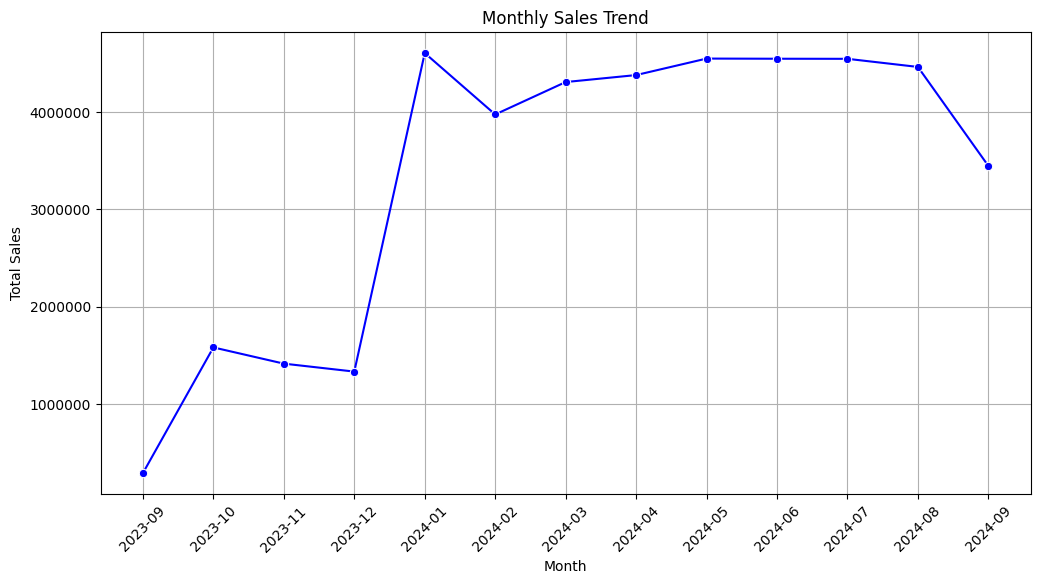

In [55]:
# Monthly Sales
monthly_sales = df.groupby("Year-Month")["Total Revenue"].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Year-Month", y="Total Revenue", marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [56]:
# Best selling product
top_products = df[df["Order Status"] == "Completed"].groupby("Product Type")["Quantity"].sum().sort_values(ascending=False)
print(top_products)


Product Type
Smartphone    21947
Tablet        15041
Laptop        14622
Smartwatch    14474
Headphones     7565
Name: Quantity, dtype: int64


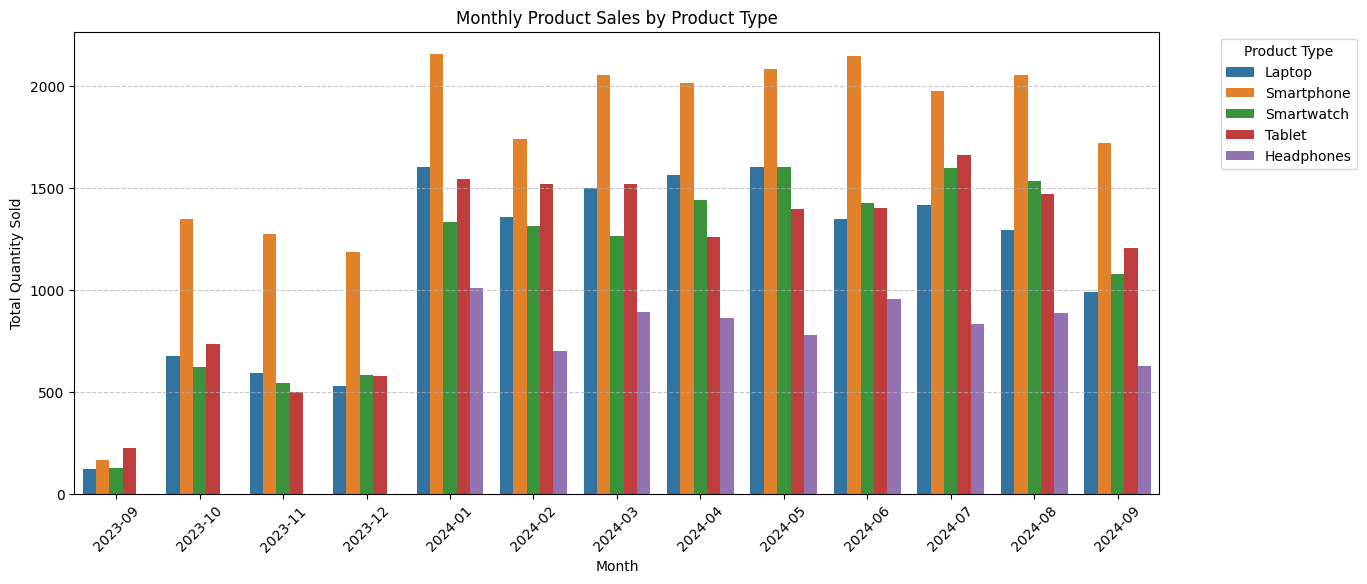

In [57]:
# Product Trend
# Group data per bulan dan produk, lalu hitung jumlah produk terjual
product_trend = df[df["Order Status"] == "Completed"].groupby(["Year-Month", "Product Type"])["Quantity"].sum()


# Reset index agar Year-Month dan Product Type jadi kolom biasa
product_trend = product_trend.reset_index()

# Plot Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(data=product_trend, x="Year-Month", y="Quantity", hue="Product Type")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.title("Monthly Product Sales by Product Type")
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [58]:
# Product Performance
total_sales = df[df['Order Status'] == 'Completed'].groupby(['Product Type','SKU', 'Unit Price']).agg(
    { 'Quantity': 'sum',
      'Total Revenue': 'sum',
      'Rating': 'mean',
     })
total_sales

Quantity  Total Revenue    Rating
Product Type SKU     Unit Price                                   
Headphones   HDP456  361.18          7560     2843241.52  2.993382
             SKU1003 826.04             5        4213.20  1.000000
Laptop       LTP123  674.32          7510     5177700.20  2.946737
             SKU1004 932.03             3        2849.96  4.000000
             SKU1005 463.96          7109     3355358.55  3.000000
Smartphone   SKU1001 20.75           7179      205280.45  5.000000
             SKU1004 791.19          7377     5892452.39  2.000000
             SKU1005 861.70             4        3515.05  2.000000
             SMP234  1139.68         7387     8529077.64  2.987370
Smartwatch   SKU1003 844.83          7131     6078908.78  3.000000
             SWT567  459.50          7343     3478507.24  3.000755
Tablet       SKU1002 247.03          7612     1939551.43  3.000000
             TBL345  786.41          7429     5953880.08  3.056493

In [59]:
# Product Delivery
product_delivery = df[df['Order Status'] == 'Completed'].groupby(['Product Type', 'SKU', 'Shipping Type']).size().unstack(fill_value=0)
product_delivery

Shipping Type         Expedited  Express  Overnight  Same Day  Standard
Product Type SKU                                                       
Headphones   HDP456         463        0          0       440       457
             SKU1003          0        0          0         0         1
Laptop       LTP123         412        0          0       432       489
             SKU1004          0        0          0         0         1
             SKU1005          0      449        442         0       460
Smartphone   SKU1001          0      455        409         0       465
             SKU1004          0      439        464         0       425
             SKU1005          0        0          0         0         1
             SMP234         438        0          0       465       443
Smartwatch   SKU1003          0      432        456         0       423
             SWT567         439        0          0       415       471
Tablet       SKU1002          0      452        476         0       454
             TBL345         457        0          0       435       471

In [60]:
# Product Payment Method
product_pay_method = df[df['Order Status'] == 'Completed'].groupby(['Product Type', 'SKU', 'Payment Method']).size().unstack(fill_value=0)
product_pay_method

Payment Method        Bank Transfer  Cash  Credit Card  Debit Card  Paypal
Product Type SKU                                                          
Headphones   HDP456             469     0          442           0     449
             SKU1003              0     0            0           1       0
Laptop       LTP123             425     0          440           0     468
             SKU1004              0     0            1           0       0
             SKU1005              0   335          332         366     318
Smartphone   SKU1001              0   344          367         291     327
             SKU1004              0   353          328         336     311
             SKU1005              0     0            1           0       0
             SMP234             439     0          455           0     452
Smartwatch   SKU1003              0   325          319         332     335
             SWT567             438     0          465           0     422
Tablet       SKU1002              0   370          317         358     337
             TBL345             487     0          432           0     444

## Customer Demographics & Behavior

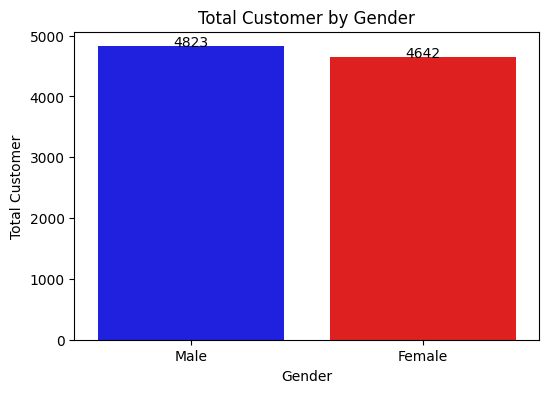

In [61]:
# Customer Gender
customer_gender_counts = df[df["Order Status"] == "Completed"].groupby("Customer ID")["Gender"].first().value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=customer_gender_counts.index, y=customer_gender_counts.values, hue=customer_gender_counts.index, palette=["blue", "red"])
plt.title("Total Customer by Gender", fontsize=12)
plt.xlabel("Gender")
plt.ylabel("Total Customer")
plt.xticks(rotation=0)
for i, v in enumerate(customer_gender_counts.values):
    plt.text(i, v + 5, str(v), ha="center", fontsize=10)
plt.show()

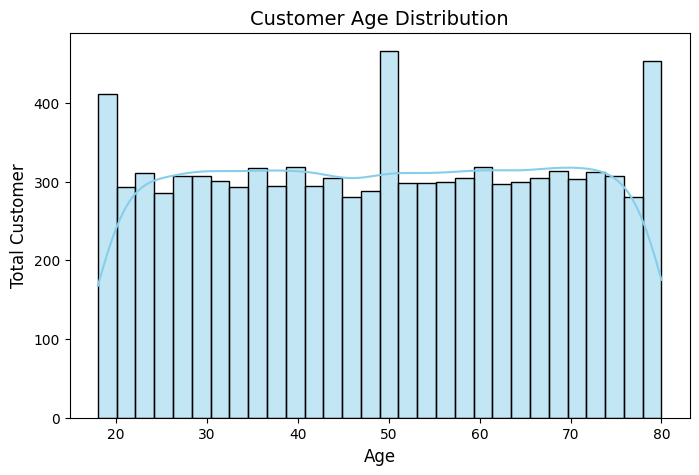

In [62]:
# Customer Age Distribution
customer_age = df[df["Order Status"] == "Completed"].groupby("Customer ID")["Age"].first()

# Plot Histogram dan KDE
plt.figure(figsize=(8, 5))
sns.histplot(customer_age, bins=30, kde=True, color="skyblue")
plt.title("Customer Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Customer", fontsize=12)
plt.show()

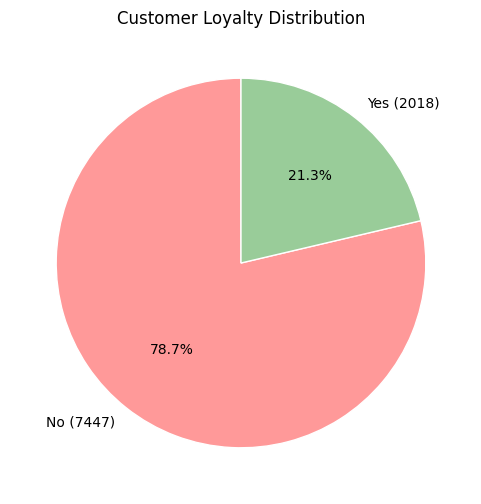

In [63]:
# Customer Loyalti Distributions
customer_loyalty = df[df["Order Status"] == "Completed"].groupby("Customer ID")["Loyalty Member"].first().value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    customer_loyalty,
    labels=[f"{label} ({count})" for label, count in zip(customer_loyalty.index, customer_loyalty.values)],
    autopct='%1.1f%%',
    colors= ["#ff9999", "#99cc99"],
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)

# Tambahkan judul
plt.title("Customer Loyalty Distribution")

# Tampilkan pie chart
plt.show()

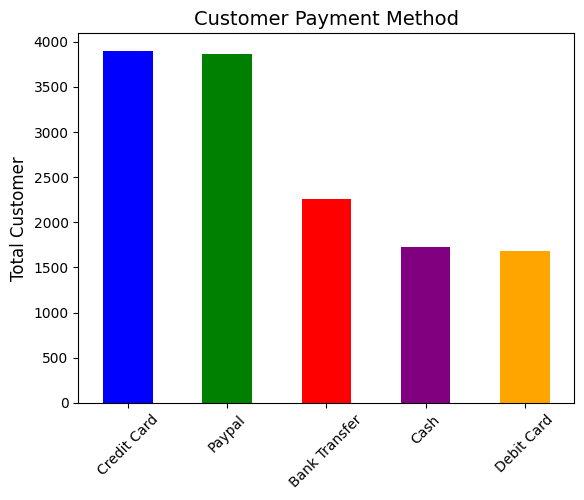

In [64]:
# Customer Payment Method
customer_pay_method = df[df["Order Status"] == "Completed"]["Payment Method"].value_counts()
colors = ["blue", "green", "red", "purple", "orange"]
customer_pay_method.plot(kind="bar", color = colors)
plt.title("Customer Payment Method", fontsize=14)
plt.ylabel("Total Customer", fontsize=12)
plt.xlabel("")
plt.xticks(rotation=45)
plt.show()


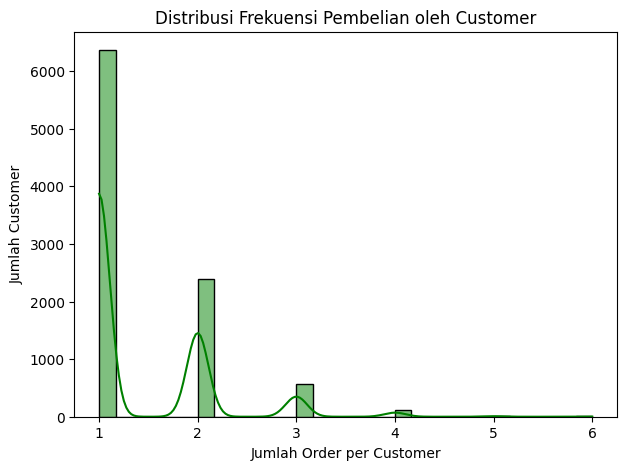

In [65]:
# Customer Freq
customer_freq = df[df['Order Status']=='Completed']["Customer ID"].value_counts()

plt.figure(figsize=(7, 5))
sns.histplot(customer_freq, bins=30, kde=True, color="green")
plt.title("Distribusi Frekuensi Pembelian oleh Customer")
plt.xlabel("Jumlah Order per Customer")
plt.ylabel("Jumlah Customer")
plt.show()

## Order Cancellation Analysis & Its Influencing Factors

In [66]:
# percentage total cancellation in general
order_status_counts = df['Order Status'].value_counts()
order_status_ratio = order_status_counts / order_status_counts.sum()
order_status_ratio

,count
Order Status,
Completed,0.671584
Cancelled,0.328416


In [67]:
# Calculating the number of completed and cancelled orders per SKU
order_counts = df.groupby(['Product Type', 'SKU', 'Order Status']).size().unstack(fill_value=0)

order_counts['Total Orders'] = order_counts['Completed'] + order_counts['Cancelled']
order_counts['% Completed'] = (order_counts['Completed'] / order_counts['Total Orders']) * 100
order_counts['% Cancelled'] = (order_counts['Cancelled'] / order_counts['Total Orders']) * 100

total_sales = total_sales.merge(order_counts[['% Completed', '% Cancelled']],
                                left_index=True, right_index=True, how='outer')

pd.set_option('display.width', 1000)
print(total_sales)



                                 Quantity  Total Revenue    Rating  % Completed  % Cancelled
Product Type SKU     Unit Price                                                             
Headphones   HDP456  361.18          7560     2843241.52  2.993382    67.661692    32.338308
             SKU1003 826.04             5        4213.20  1.000000   100.000000     0.000000
Laptop       LTP123  674.32          7510     5177700.20  2.946737    68.010204    31.989796
             SKU1004 932.03             3        2849.96  4.000000   100.000000     0.000000
             SKU1005 463.96          7109     3355358.55  3.000000    67.180507    32.819493
Smartphone   SKU1001 20.75           7179      205280.45  5.000000    67.393509    32.606491
             SKU1004 791.19          7377     5892452.39  2.000000    65.807730    34.192270
             SKU1005 861.70             4        3515.05  2.000000   100.000000     0.000000
             SMP234  1139.68         7387     8529077.64  2.987370    

In [68]:
# Cancelation by Payment Method
cancel_by_pay_method = df.groupby(['Payment Method', 'Order Status']).size().unstack(fill_value=0)
total_cancelled = cancel_by_pay_method["Cancelled"].sum()
total_completed = cancel_by_pay_method["Completed"].sum()

cancel_by_pay_method["Cancelled Contribution (%)"] = (cancel_by_pay_method["Cancelled"] / total_cancelled) * 100
cancel_by_pay_method["Completed Contribution (%)"] = (cancel_by_pay_method["Completed"] / total_completed) * 100

cancel_by_pay_method[["Cancelled", "Cancelled Contribution (%)", "Completed", "Completed Contribution (%)"]]




Order Status,Cancelled,Cancelled Contribution (%),Completed,Completed Contribution (%)
Payment Method,,,,
Bank Transfer,1112,16.930572,2258,16.811853
Cash,765,11.647381,1727,12.858313
Credit Card,1969,29.978685,3899,29.029856
Debit Card,787,11.982339,1684,12.538158
Paypal,1935,29.461023,3863,28.761820


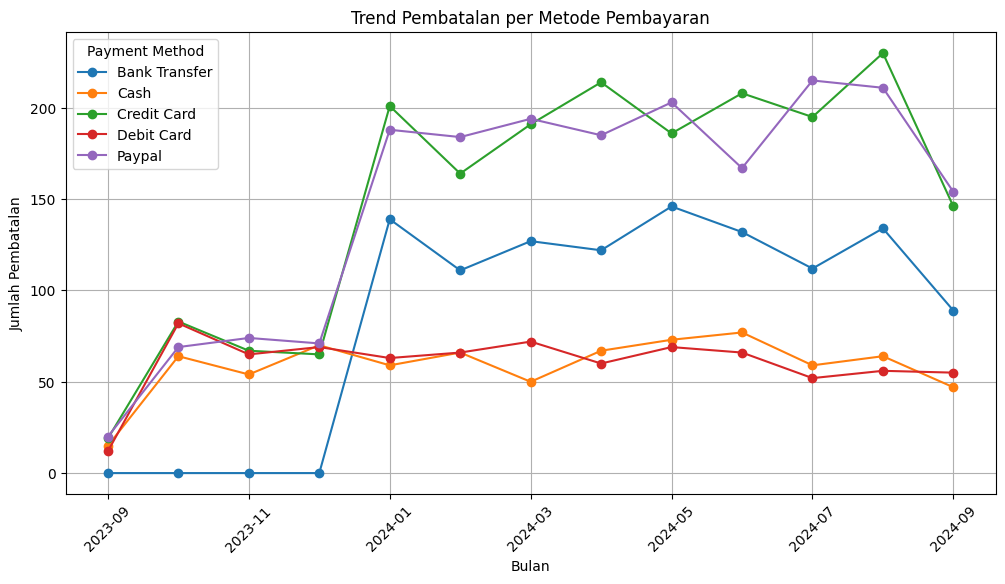

In [69]:
# Purchase cancellation trend
df["Year-Month"] = df["Year-Month"].astype(str)
monthly_cancel = df[df["Order Status"] == "Cancelled"].groupby(["Year-Month", "Payment Method"]).size().unstack()
monthly_cancel = monthly_cancel.fillna(0)
# Visualization
monthly_cancel.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Trend Pembatalan per Metode Pembayaran")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pembatalan")
plt.legend(title="Payment Method")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        19999 non-null  int64         
 1   Age                19999 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     19999 non-null  object        
 4   Product Type       19999 non-null  object        
 5   SKU                19999 non-null  object        
 6   Rating             19999 non-null  int64         
 7   Order Status       19999 non-null  object        
 8   Payment Method     19999 non-null  object        
 9   Total Price        19999 non-null  float64       
 10  Unit Price         19999 non-null  float64       
 11  Quantity           19999 non-null  int64         
 12  Purchase Date      19999 non-null  datetime64[ns]
 13  Shipping Type      19999 non-null  object        
 14  Add-ons Pur

## Correlation analysis of each column.

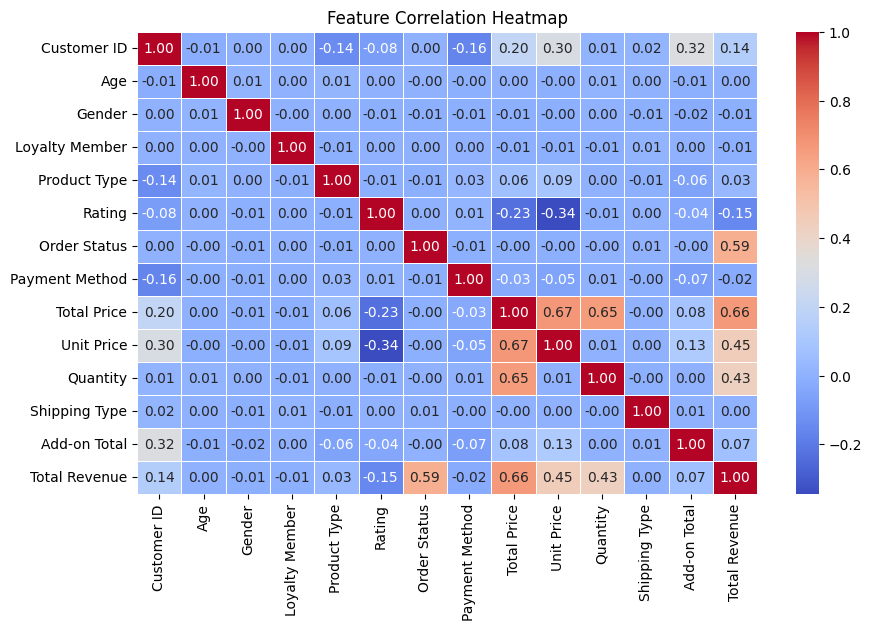

In [71]:
# Kolom kategori yang ingin dikonversi
categorical_columns = ["Gender", "Loyalty Member", "Product Type", "Order Status", "Payment Method", "Shipping Type"]
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

drop_columns = ["SKU", "Add-ons Purchased", "Purchase Date", "Year-Month"]
df_encoded = df_encoded.drop(columns=drop_columns)

correlation_matrix = df_encoded.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Customer Segmentation Using RFM Analysis

In [124]:
# RFM analysis
reference_date = '2024-10-01'
reference_date = pd.to_datetime(reference_date)

rfm = df[df["Order Status"] == "Completed"].groupby('Customer ID').agg({
    'Purchase Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Customer ID': 'count',  # Frequency
    'Total Revenue': 'sum'  # Monetary
}).rename(columns={'Purchase Date': 'Recency', 'Customer ID': 'Frequency', 'Total Revenue': 'Monetary'})

rfm


,Recency,Frequency,Monetary
Customer ID,,,
1000,164,1,767.18
1002,53,2,5080.76
1003,133,1,77.06
1004,128,1,148.78
1005,99,2,11854.44
...,...,...,...
19988,111,1,8194.70
19990,149,1,9231.00
19991,23,2,12368.06


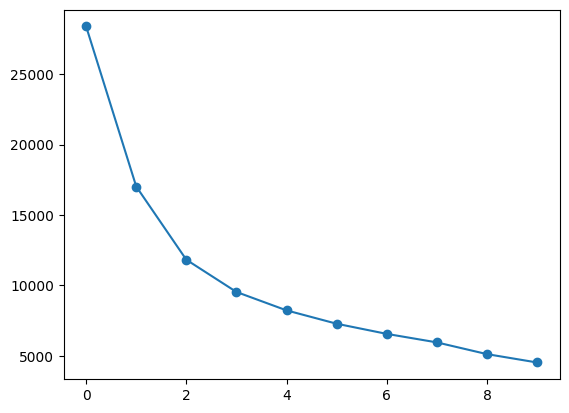

In [125]:

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

inertia = []
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit_transform(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')

In [129]:
# Using KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled)
rfm['Cluster'] = kmeans.labels_

In [128]:
# Result of clustering
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,93.854467,2.398655,9707.278338
1,87.733267,1.185369,3258.578316
2,250.875743,1.091855,3019.547188
